In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from compressive import fourier_cs, fourier_denoising
import functools
import fourier_basis as ft
import matplotlib.pyplot as plt
%matplotlib inline
def plot(data):
    plt.figure()
    sns.tsplot(data)
import basis_pursuit as bp

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


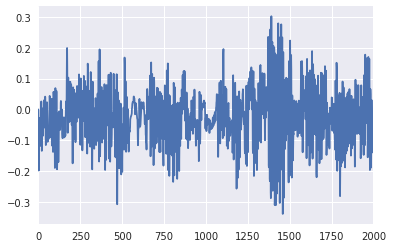

In [2]:
n = 1999
y = np.loadtxt('for_james.txt')
plot(y)

In [13]:
#freq, rec = fourier_cs(y, 2)
denoiser = functools.partial(fourier_denoising, 1e3)
#f_approx, rec_approx = fourier_cs(y,1.5, method = denoiser)
sft = bp.sparseft(y, alpha=1.5e-5)

norm diff:  0.6446099760749783
norm diff:  2.3782140231596467e-14


## Spectral comparison of basis pursuit, basis pursuit denoising and FFT

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


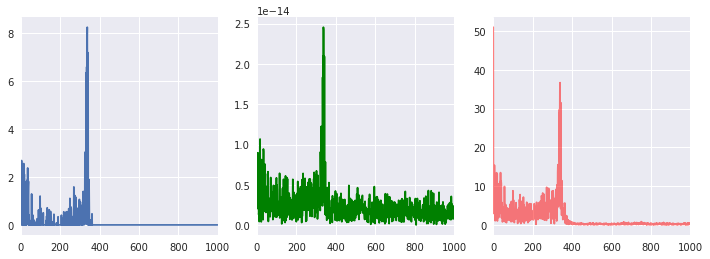

In [15]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(12)
sns.tsplot(np.sqrt(1000)*np.abs(ft.half_package(sft)), ax = ax[0])
sns.tsplot(np.sqrt(1000)*np.abs(ft.half_package(f_approx[1::])), ax = ax[1], color='g')
sns.tsplot(np.abs(np.fft.fft(y))[0:1000], color='r', alpha = 0.5, ax = ax[2])